# Convolutional neural network applied on MNIST#

In this project, I'm working with the MNIST, a "database of handwritten digits that has a training set of 60000 examples, and a test set of 10000 examples. It's a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size 28x28 image" ([LeCun's website](http://yann.lecun.com/exdb/mnist/)).

I'm going to use the Convolutional neural network (CNN) to classify MNIST, from 0 to 9.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from  PIL import Image

# Start interactive session
session = tf.InteractiveSession()

## Import the input data from MNIST ##

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

## Create parameters for the model ##

In [5]:
# width of the input image in pixels
width = 28
# height of the input image in pixels
height = 28
# number of pixels per image
flat = width * height
# number of possible classification for the output
class_output = 10

## Input x and output y##
Create placeholders for inputs and outputs

In [6]:
x = tf.placeholder(tf.float32, shape=[None, flat])
y = tf.placeholder(tf.float32, shape=[None, class_output])

## Converting images of the dataset to tensors##

**Tensor_shape = [batch, width, height, channel]**

The batch number of the image is the first dimension, and it can be of any size ==> so I set it to -1.

The input images is 28x28 pixels, 1 channel (grayscale) ==> width = 28, height = 28, channel = 1.

In [8]:
x_tensor = tf.reshape(x, [-1,28,28,1])
x_tensor

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

## The convolution architecture##

Here is my overall CNN architecture:

|Layer/Step|Data Shape|
|---------|-----------|
|**input**|[?,28,28,1]|
|*apply 32 filters of size [5x5]*||
|Convolutional layer 1|[?,28,28,32]|
|Activation ReLu 1|[?,28,28,32]|
|Max-Pooling 1|[?,14,14,32]|
|*apply 64 filters of size [5x5x32]*||
|Convolutional layer 2|[?,14,14,64]|
|Acivation ReLu 2|[?,14,14,64]|
|Max-Pooling 2|[?, 7, 7,64]|
|Fully-Connected layer 3|[?, 1024]|
|Actiovation ReLu 3|[?, 1024]|
|Drop out|[?, 1024]|
|Fully-Connected layer 4|[?, 10]|
|**output**|[?, 10]|

## Convolutional - first layer ##

**filter_shape = [filter_height, filter_width, in_channels, out_channels]**

**Defining filter weight and bias**
- The size of filter is defined as 5x5.
- Input channels is 1 (grayscale).
- We need 32 different fiters in order to output 32 different feature maps, so the output channel (or depth or bias) is 32. 

In [11]:
# the filter weight, truncated randomly from a normal distribution
W_conv1 = tf.Variable(tf.truncated_normal([5,5,1,32], stddev=0.1))

# the filter biases, we need 32 biases for 32 outputs.
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

In [15]:
# set the convolutional layer 1, outputing the feature map containing 32 [28x28] images 
convolve1 = tf.nn.conv2d(x_tensor, W_conv1, strides=[1,1,1,1], padding="SAME") + b_conv1
convolve1

<tf.Tensor 'add_1:0' shape=(?, 28, 28, 32) dtype=float32>

**Activating ReLu function 1**

In [16]:
# When ReLu function is activated, negative numbers in a array will be swapped out for 0
r_convolve1 = tf.nn.relu(convolve1)
r_convolve1

<tf.Tensor 'Relu_1:0' shape=(?, 28, 28, 32) dtype=float32>

**Applying Max-Pooling 1**

Down-sampling the images by using the max pooling layer, with Kernel size = [2x2].

In [17]:
conv1 = tf.nn.max_pool(r_convolve1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

First layer completed.

## Convolutional - second layer##

**Identify weights and biases of kernels**

We apply the convolution again in this layer.

The input of this layer is the output of the convolution layer 1 ==> size [14x14x32].

We need 64 filters of size [5x5x32] in order to output 64 feature maps (or depth = bias = 64). In other words, as long as we keep training the model through convolutional layers, the feature map is going deeper and deeper. 

In [19]:
# the filter weight
W_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64], stddev=0.1))

# the filter bias
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

In [20]:
# convolve image with weight tensor and add biases
convolve2 = tf.nn.conv2d(conv1, W_conv2, strides=[1,1,1,1], padding="SAME") + b_conv2
convolve2

<tf.Tensor 'add_2:0' shape=(?, 14, 14, 64) dtype=float32>

**Activating ReLu function 2**

In [21]:
r_convolve2 = tf.nn.relu(convolve2)
r_convolve2

<tf.Tensor 'Relu_2:0' shape=(?, 14, 14, 64) dtype=float32>

**Applying the max-pooling 2**

In [22]:
conv2 = tf.nn.max_pool(r_convolve2, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

The seconde layer is completed, outputing 64 matrices of [7x7].

Now, it's time to flatten the matrices using a Fully-Connected layer.

## Fully-Conntected - third layer ##

We need a fully-connected layer to use the Softmax and create the probabilities in the end.

Each matrix [7x7] will be connected to a matrix of [49x1], and then all of the 64 matrix will be connected; which make an array of size [3136x1] (3136 = 49*64).

We will connect it into another layer of size [1x1024]. So, the weight between these 2 layers will be [3136x1024].

In [24]:
# flattening second layer
layer2_flat = tf.reshape(conv2, [-1, 7*7*64])
layer2_flat

<tf.Tensor 'Reshape_2:0' shape=(?, 3136) dtype=float32>

**Weights and Biases between layer 2 and 3**

In [29]:
W_fc1 = tf.Variable(tf.truncated_normal([3136, 1024], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))  # need 1024 biases for 1024 outputs to Softmax layer

**Dot multiplication between flattened layer and the weights then add biases**

In [26]:
fc1 = tf.matmul(layer2_flat, W_fc1) + b_fc1
fc1

<tf.Tensor 'add_3:0' shape=(?, 1024) dtype=float32>

**Activation ReLu function 3**

In [27]:
r_fc1 = tf.nn.relu(fc1)
r_fc1

<tf.Tensor 'Relu_3:0' shape=(?, 1024) dtype=float32>

Third layer completed.

**Drop-out layer, Optional phase for reducing overfitting**

In [28]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(r_fc1, keep_prob)
layer_drop

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

## Fully-Connected - last layer##

In this layer, there are 1024 input channels, that will be translate into 10 output features (0 -> 9).

In [31]:
# weights and biases
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))  # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

# matrix multiplication and bias addition
fc2 = tf.matmul(layer_drop, W_fc2) + b_fc2

# Softmax activation function
y_CNN = tf.nn.softmax(fc2)
y_CNN

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

Great! I finished building the CNN architecture. Now let's define some more functions and train the model.

## Define functions and train the model##

**Define the loss function**

Caculate the error at a lastest layer (here, the softmax layer **y_CNN**) by comparing with our output **y**.  

In [33]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_CNN), reduction_indices=[1]))

**Define the optimizer**

Compute gradients for the loss (which is minimizing the cross-entroupy) and apply gradients to variables.

In [35]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Instructions for updating:
Use tf.cast instead.


**Define prediction**

To see how many of the cases in a mini-batch has been classified correctly.

In [39]:
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**Run session and Train**

In [41]:
# run the initialization of our variables
session.run(tf.global_variables_initializer())

# train
for i in range(5000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batch[0], y:batch[1], keep_prob:1.0})
        print("step %d: training accuracy %g" % (i, float(train_accuracy)))
    train_step.run(feed_dict={x:batch[0], y:batch[1], keep_prob:0.5})

step 0: training accuracy 0.08
step 100: training accuracy 0.74
step 200: training accuracy 0.92
step 300: training accuracy 0.94
step 400: training accuracy 1
step 500: training accuracy 1
step 600: training accuracy 0.96
step 700: training accuracy 0.92
step 800: training accuracy 0.88
step 900: training accuracy 0.92
step 1000: training accuracy 0.98
step 1100: training accuracy 1
step 1200: training accuracy 0.98
step 1300: training accuracy 0.98
step 1400: training accuracy 0.96
step 1500: training accuracy 0.98
step 1600: training accuracy 0.98
step 1700: training accuracy 0.92
step 1800: training accuracy 0.96
step 1900: training accuracy 0.96
step 2000: training accuracy 1
step 2100: training accuracy 0.96
step 2200: training accuracy 0.94
step 2300: training accuracy 0.96
step 2400: training accuracy 1
step 2500: training accuracy 0.98
step 2600: training accuracy 1
step 2700: training accuracy 0.98
step 2800: training accuracy 0.96
step 2900: training accuracy 0.98
step 3000:

## Evaluate the model##

In [42]:
n_batches = mnist.test.images.shape[0] // 50
culmul_accuracy = 0.0
for index in range(n_batches):
    batch = mnist.test.next_batch(50)
    culmul_accuracy += accuracy.eval(feed_dict={x:batch[0], y:batch[1], keep_prob:1.0})

print("test accuracy {}".format(culmul_accuracy / n_batches))

test accuracy 0.9855000045895577


## Visualization##

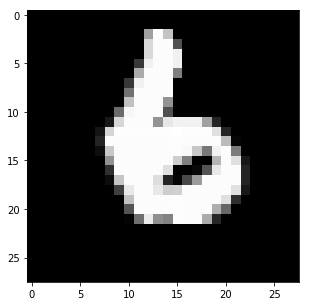

In [45]:
# show an input of the test data
plt.rcParams['figure.figsize'] = (5.0, 5.0)
input_one = mnist.test.images[2]
plt.imshow(np.reshape(input_one, [28,28]), cmap='gray')
plt.show()

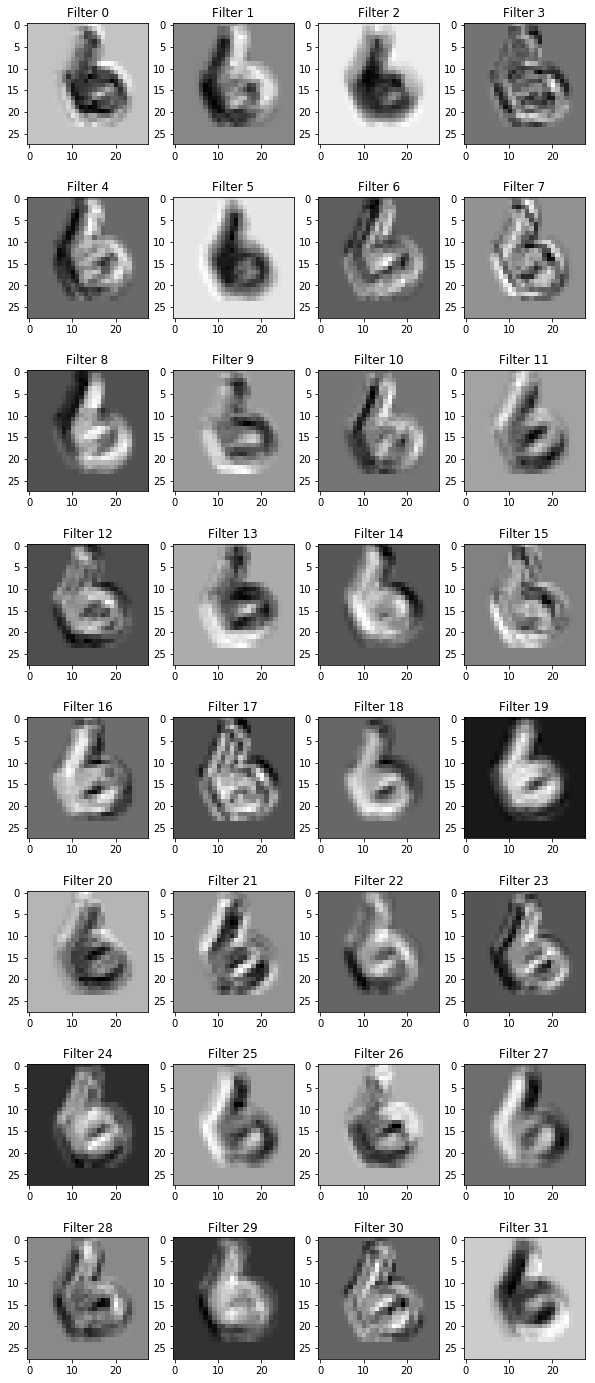

In [74]:
# show the feature map of the first convolutional layer (32 filters)
ActivatedUnits = session.run(convolve1,feed_dict={x:np.reshape(input_one,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(10,25))
n_columns = 4
n_rows = np.math.ceil(filters / n_columns)
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

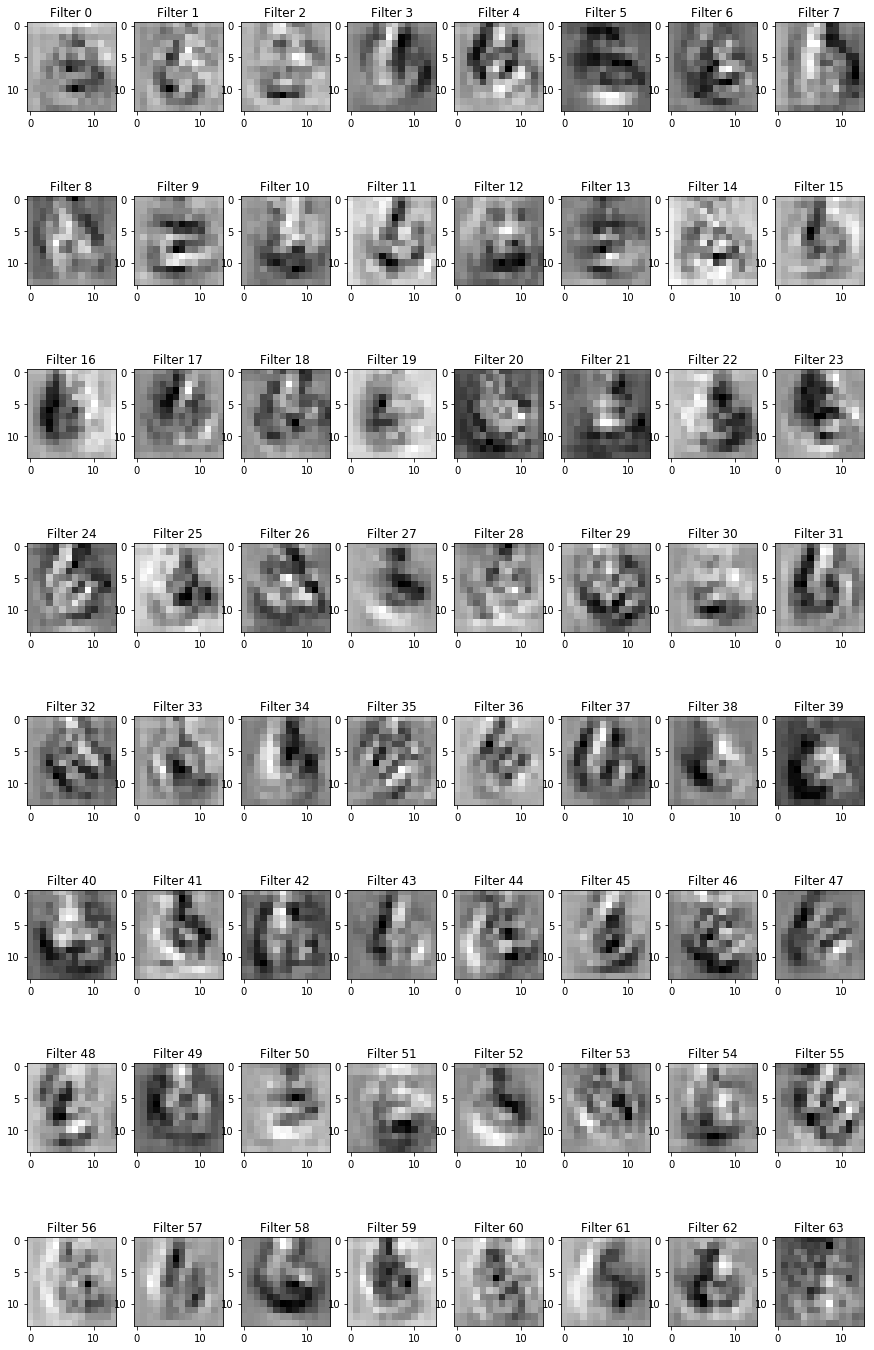

In [75]:
# show the feature map of the second convolutional layer (64 filters)
ActivatedUnits = session.run(convolve2,feed_dict={x:np.reshape(input_one,[1,784],order='F'),keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(15,25))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns)
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")